# Healthcare-Diabetes

In [1]:
# Importing all the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Fetching the data from the local file into the dataframe
diabetes_df=pd.read_csv('E:\DATA SCIENCE\CAPSTONE PROJECT\Project 2\Healthcare - Diabetes\health care diabetes.csv')
diabetes_df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Exploratory Data Analysis(EDA)- Descriptive Analytics

In [3]:
diabetes_df.info() #getting the information about the data in the dataframe.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
diabetes_df.shape #Checking the rows and columns of the dataframe.

(768, 9)

In [5]:
diabetes_df.drop_duplicates(inplace=True) # Dropping the rows if any present in the dataframe.

## Description:

* Pregnancies: Number of times pregnant.
* Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test.
* BloodPressure: Diastolic blood pressure (mm Hg).
* SkinThickness: Triceps skin fold thickness (mm).
* Insulin: 2-Hour serum insulin (mu U/ml).
* BMI: Body mass index (weight in kg/(height in m)^2).
* DiabetesPedigreeFunction: Function that determines the risk of type2 diabetes.
* Age: Age (years).
* Outcome: Class variable (0 or 1) 268 of 768 are 1, the others are 0.

In [6]:
print('shape_df:',diabetes_df.shape) #To check the dataframe shape after dropping duplicates
print('size_df:',diabetes_df.size) # To check the total number of data points in the dataset.

shape_df: (768, 9)
size_df: 6912


In [7]:
diabetes_df.isin({0}).sum() #To check if any zero values are present in the current dataset,if any view out their total 
                                #values column wise.

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

In [8]:
 # Creating a function to view out histogram plots of all features in the dataframe. 
def plot(column_name,color):
    plt.figure(figsize=(5,2))
    x=sns.histplot(x=diabetes_df[column_name],kde=True,color=color).set(title='Distribution of {}'.format(column_name))
    return x

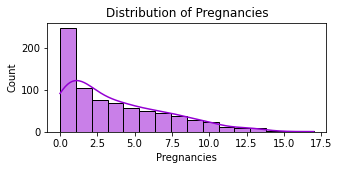

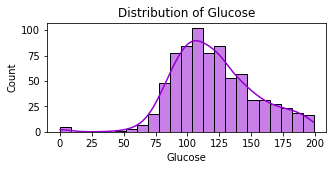

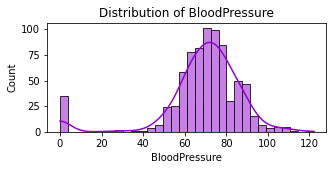

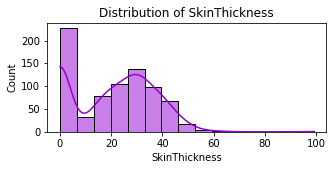

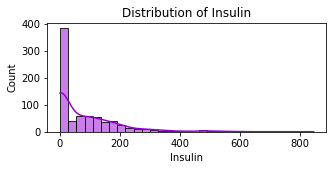

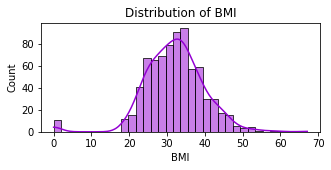

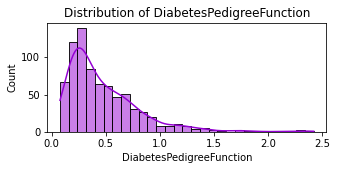

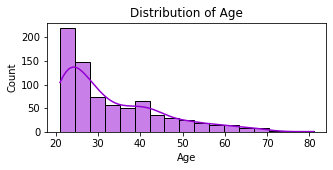

In [9]:
df=diabetes_df.iloc[:,:-1]
features=np.array(df.keys())
for i in features: # Creating a for_loop to view all the feature plots.
    plot(i,'Darkviolet')

#### From the above plots ,because of zero values in the dataframe  this lead to large deviation in the data.So in order to make the data to be statistically distributed ,the data values with zero should be replace the statistical measures based on the type,the data is distributed. 

In [10]:
print(diabetes_df['Glucose'].where(diabetes_df['Outcome']==1).median())
print(diabetes_df['Glucose'].where(diabetes_df['Outcome']==0).median())

140.0
107.0


In [11]:
diabetes_df.loc[(diabetes_df['Outcome']==0) & (diabetes_df['Glucose'].isin({0})),'Glucose']=107
diabetes_df.loc[(diabetes_df['Outcome']==1) & (diabetes_df['Glucose'].isin({0})),'Glucose']=140

In [12]:
print(diabetes_df['SkinThickness'].where(diabetes_df['Outcome']==1).median())
print(diabetes_df['SkinThickness'].where(diabetes_df['Outcome']==0).median())

27.0
21.0


In [13]:
diabetes_df.loc[(diabetes_df['Outcome']==0) & (diabetes_df['SkinThickness'].isin({0})),'SkinThickness']=21.0
diabetes_df.loc[(diabetes_df['Outcome']==1) & (diabetes_df['SkinThickness'].isin({0})),'SkinThickness']=27.0

In [14]:
print(diabetes_df['BloodPressure'].where(diabetes_df['Outcome']==1).median())
print(diabetes_df['BloodPressure'].where(diabetes_df['Outcome']==0).median())

74.0
70.0


In [15]:
diabetes_df.loc[(diabetes_df['Outcome']==0) & (diabetes_df['BloodPressure'].isin({0})),'BloodPressure']=70
diabetes_df.loc[(diabetes_df['Outcome']==1) & (diabetes_df['BloodPressure'].isin({0})),'BloodPressure']=74

In [16]:
print(diabetes_df['Insulin'].where(diabetes_df['Outcome']==1).mean())
print(diabetes_df['Insulin'].where(diabetes_df['Outcome']==0).mean())

100.33582089552239
68.792


In [17]:
diabetes_df.loc[(diabetes_df['Outcome']==0) & (diabetes_df['Insulin'].isin({0})),'Insulin']=68.79
diabetes_df.loc[(diabetes_df['Outcome']==1) & (diabetes_df['Insulin'].isin({0})),'Insulin']=100.34

In [18]:
print(diabetes_df['BMI'].where(diabetes_df['Outcome']==1).mean())
print(diabetes_df['BMI'].where(diabetes_df['Outcome']==0).mean())

35.14253731343278
30.30419999999996


In [19]:
diabetes_df.loc[(diabetes_df['Outcome']==0) & (diabetes_df['BMI'].isin({0})),'BMI']=30.30
diabetes_df.loc[(diabetes_df['Outcome']==1) & (diabetes_df['BMI'].isin({0})),'BMI']=35.14

In [20]:
diabetes_df.isin({0}).sum() #To check if any zero values are present in the current dataset,if any view out their total 
                                #values column wise.

Pregnancies                 111
Glucose                       0
BloodPressure                 0
SkinThickness                 0
Insulin                       0
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

## Distribution of features in the dataframe

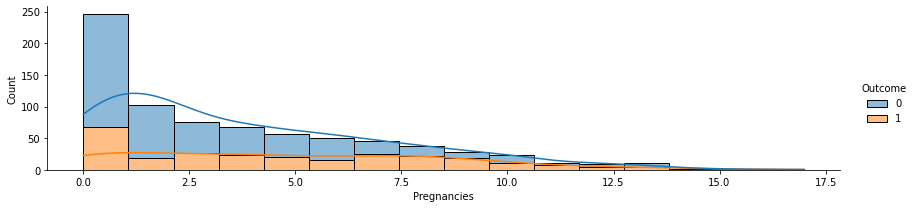

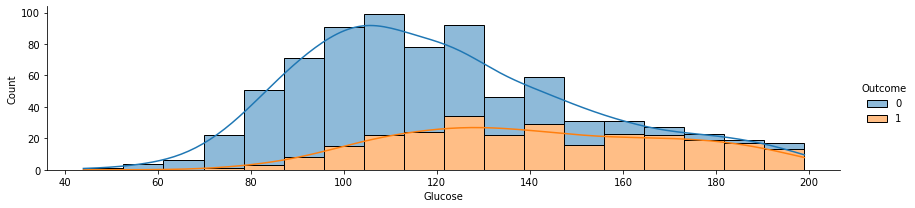

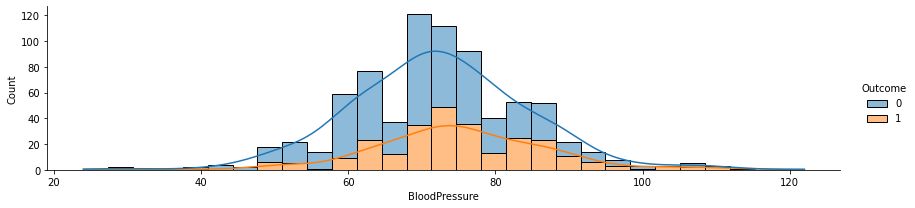

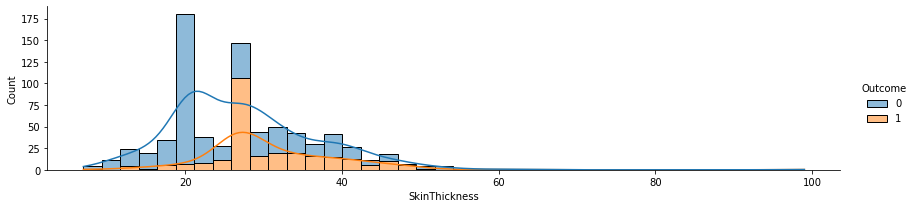

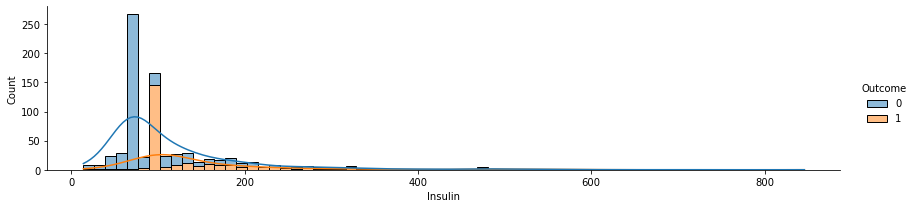

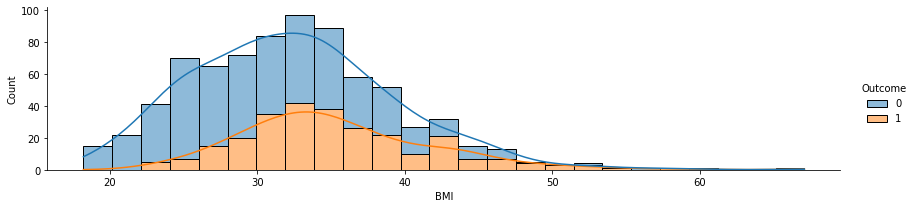

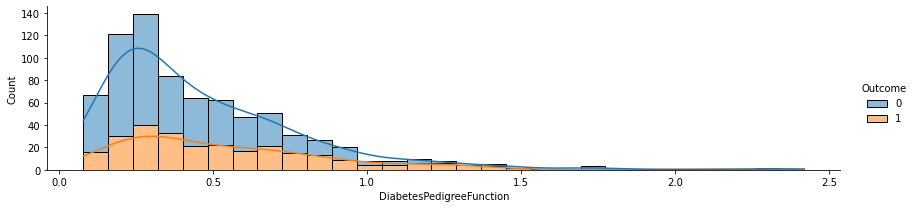

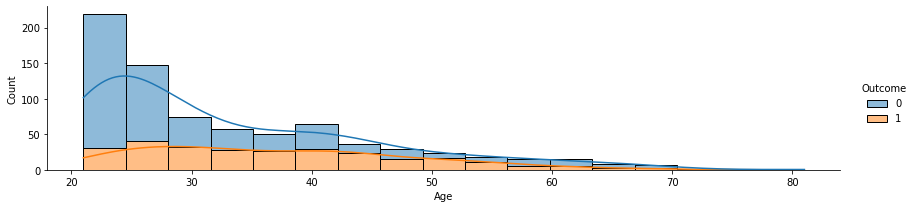

In [21]:
for i in features:
    sns.displot(x=diabetes_df[i],hue=diabetes_df['Outcome'],kde=True,multiple="stack",height=3,aspect=4)

    From the above distribution plots,we can observe that insulin,DiabetespedigreeFunction,age,pregnancies are highly skewed distribution where as other values are normal distributed.

In [22]:
diabetes_df.dtypes.value_counts() # Counting the columns with different types of data.

int64      6
float64    3
dtype: int64

<AxesSubplot:ylabel='None'>

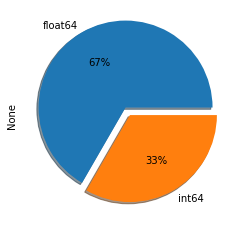

In [23]:
# Creating a pie plot to view the datatypes and the datatype occupancy in the dataframe.
diabetes_df.dtypes.value_counts().plot.pie(explode=[0.1,0],labels=['float64','int64'],shadow=True,
                                           autopct='%.f%%')

    From the pie chart, we can observe that 67% of the data are of float type and remaining 33% are if int type.

In [24]:
diabetes_df['Outcome'].value_counts() # Viewing the count of target values through value_counts().

0    500
1    268
Name: Outcome, dtype: int64

In [25]:
diabetes_df.describe() # To view the distribution and statistical measures of features in the dataframe.

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.677083,72.378906,27.43099,118.967917,32.439167,0.471876,33.240885,0.348958
std,3.369578,30.464161,12.104431,9.32146,93.558079,6.880462,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.00000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,21.00000,68.790000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,27.00000,100.000000,32.050000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.00000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.00000,846.000000,67.100000,2.420000,81.000000,1.000000


In [26]:
diabetes_df.head() #To view the top 5 rows 

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,100.34,33.6,0.627,50,1
1,1,85,66,29,68.79,26.6,0.351,31,0
2,8,183,64,27,100.34,23.3,0.672,32,1
3,1,89,66,23,94.00,28.1,0.167,21,0
4,0,137,40,35,168.00,43.1,2.288,33,1


In [27]:
diabetes_df['Outcome'].replace({0:'Non_diabetic',1:'Diabetic'},inplace=True) # Replacing the binary digits with appropiate 
                                                                             # words to make the taget to be more meaningfull.

## Plot of target value counts categorically.

[Text(0, 0, '268'), Text(0, 0, '500')]

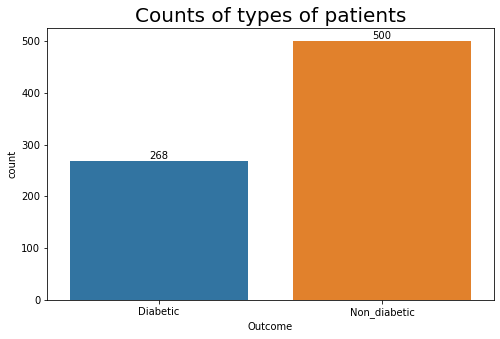

In [28]:
plt.figure(figsize=(8,5))
ax=sns.countplot(x=diabetes_df['Outcome'])
ax.set_title('Counts of types of patients',fontdict={'size':20})
ax.bar_label(ax.containers[0])

    # From the above plot,
            * 268 out of 768 pateints were recorded as diabetic.
            * 500 out of 768 patients were recorded as non-diabetic.

In [29]:
ndf=diabetes_df.copy(deep=True) # Creating a copy of main dataframe

Text(0.5, 1.0, 'Pregnancies w.r.t types of patients')

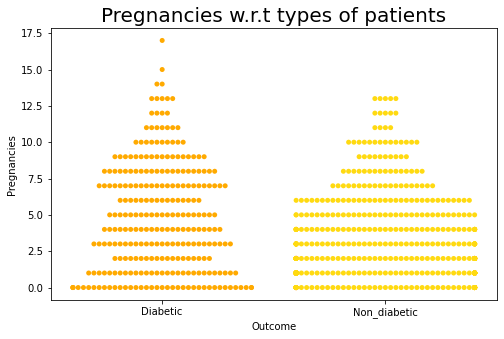

In [30]:
plt.figure(figsize=(8,5))
sns.swarmplot(data=diabetes_df,x='Outcome',y='Pregnancies',palette='Wistia_r')
plt.title('Pregnancies w.r.t types of patients',fontdict={'size':20})

In [31]:
# A function to get the values at top and bottom ranked categorically.
def extremums(column,units):
    x1=print('* The highest {} recorded for a non_diabetic patient is {} {}'.
      format(str(column),max(diabetes_df[column][diabetes_df['Outcome']=='Non_diabetic']),units))
    x2=print('* The lowest {} recorded for a non_diabetic patient is {} {}'.
      format(str(column),min(diabetes_df[column][diabetes_df['Outcome']=='Non_diabetic']),units))
    x3=print('* The highest {} recorded for a diabetic patient is {} {}'.
      format(str(column),max(diabetes_df[column][diabetes_df['Outcome']=='Diabetic']),units))
    x4=print('* The lowest {} recorded for a diabetic patient is {} {}'.
      format(str(column),min(diabetes_df[column][diabetes_df['Outcome']=='Diabetic']),units))    

In [32]:
extremums('Pregnancies','')

* The highest Pregnancies recorded for a non_diabetic patient is 13 
* The lowest Pregnancies recorded for a non_diabetic patient is 0 
* The highest Pregnancies recorded for a diabetic patient is 17 
* The lowest Pregnancies recorded for a diabetic patient is 0 


[Text(0, 0, '73'),
 Text(0, 0, '106'),
 Text(0, 0, '84'),
 Text(0, 0, '48'),
 Text(0, 0, '45'),
 Text(0, 0, '36'),
 Text(0, 0, '34'),
 Text(0, 0, '20'),
 Text(0, 0, '16'),
 Text(0, 0, '10'),
 Text(0, 0, '14'),
 Text(0, 0, '4'),
 Text(0, 0, '5'),
 Text(0, 0, '5'),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, '')]

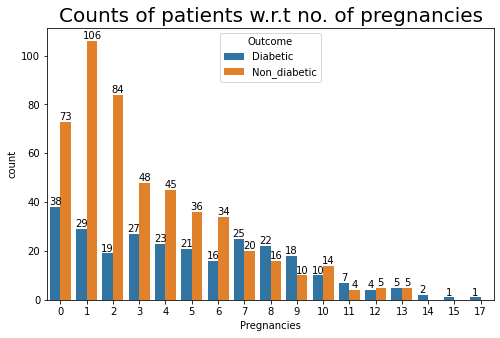

In [33]:
plt.figure(figsize=(8,5))
ax=sns.countplot(x=diabetes_df['Pregnancies'],hue=diabetes_df['Outcome'])
ax.set_title('Counts of patients w.r.t no. of pregnancies',fontdict={'size':20})
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])

    From the above plot,
        * Most of the recorded non_diabetic patients were conceived for 1 time (i.e Out of 500,106 patients got pregnant for 1 time).
        * Least of the recorded non diabetic patients were conceived for 11 times and the number of patients were 4 out of 500.
        * Maximum number of recorded diabetic patients who were recorded found to be conceived Zero times are 38 in number out of 268 diabetic patients.
        * Minimum number of recorded diabetic patients who were recorded found to be conceived 17 times are 1 in number out of 268 diabetic patients.
        * 5 diabetic and 5 non_diabetic patients were found to be conceived for 13 times.

Text(0.5, 1.0, 'Insulin w.r.t Outcomes')

<Figure size 576x360 with 0 Axes>

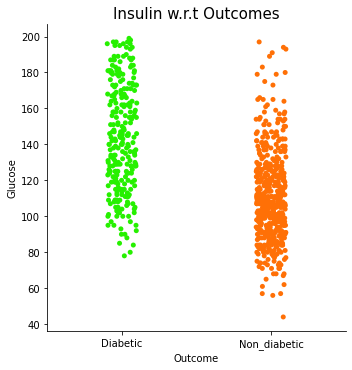

In [34]:
plt.figure(figsize=(8,5))
ax=sns.catplot(data=diabetes_df,x='Outcome',y='Glucose',palette='gist_ncar')
plt.title('Insulin w.r.t Outcomes',size=15)

     From the above plot,
           * we can concluded that diabetic patients are recorded with more glucose levels than non_diabetic patients.
            

In [35]:
extremums('Glucose','mg/dl')

* The highest Glucose recorded for a non_diabetic patient is 197 mg/dl
* The lowest Glucose recorded for a non_diabetic patient is 44 mg/dl
* The highest Glucose recorded for a diabetic patient is 199 mg/dl
* The lowest Glucose recorded for a diabetic patient is 78 mg/dl


### Glucose levels categorisation:

     The recorded glucose levels can be categorise patients as:1. Normal blood sugar (<140 mg/dl).
                                                               2. Prediabetic (140 mg/dl to 199 mg/dl).
                                                               3. Abnormal sugar level (>200mg/dl).

In [36]:
# Categoriesing glucose values based on glucose levels.
for x in diabetes_df['Glucose']:
    if x<=140:
        diabetes_df['Glucose'].replace(x,'Normal blood sugar',inplace=True)
    elif (x>140 and x<200):
        diabetes_df['Glucose'].replace(x,'Prediabetic',inplace=True)
    elif x>200:
        diabetes_df['Glucose'].replace(x,'Abnormal sugar level',inplace=True) 

[Text(0, 0, '60'), Text(0, 0, '440')]

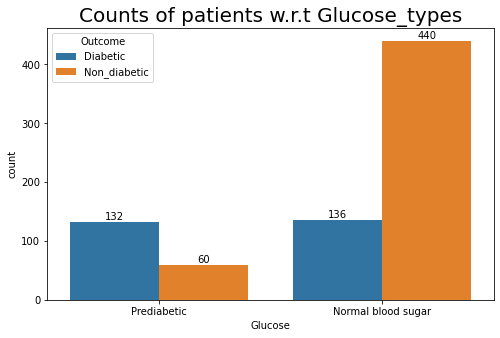

In [37]:
plt.figure(figsize=(8,5))
ax=sns.countplot(x=diabetes_df['Glucose'],hue=diabetes_df['Outcome'])
ax.set_title('Counts of patients w.r.t Glucose_types',fontdict={'size':20})
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])

    From the above plot,
        * we can conclude that in the recorded patients there were no abnormal sugar patients.
        * Most of the recorded patients who gave samples for oral glucose tolerance test were found to have Normal glucose  level.i.e., out of 768 patients,576 patients were tested normal for OGTT and remaining 192 were tested prediabtic.
        * Out of 268 diabetic patients,132 were recorded with prediabetic and 136 were recorded with normal blood sugar.
        * Out of 500 non diabetic patients,60 recorded with prediabetic and 440 recorded with normal blood sugar.        

Text(0.5, 1.0, 'Blood pressure w.r.t types of patients')

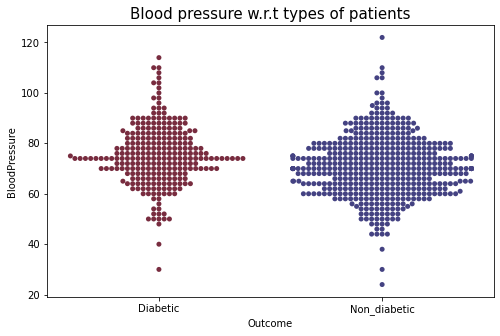

In [38]:
plt.figure(figsize=(8,5))
ax=sns.swarmplot(data=diabetes_df,x='Outcome',y='BloodPressure',palette='icefire_r')
ax.set_title('Blood pressure w.r.t types of patients',size=15)

     * Non_diabetic patients were found to be recorded highest Blood pressure levels than diabetic patients. 

In [39]:
extremums('BloodPressure','mmHg')

* The highest BloodPressure recorded for a non_diabetic patient is 122 mmHg
* The lowest BloodPressure recorded for a non_diabetic patient is 24 mmHg
* The highest BloodPressure recorded for a diabetic patient is 114 mmHg
* The lowest BloodPressure recorded for a diabetic patient is 30 mmHg


### Blood pressure categories based on diastolic blood pressure levels:
    The diastolic_BP levels recorded for patients are categorised as:1.Normal (<80mmHg).
                                                                     2.Prehypertension (80-89 mmHg).
                                                                     3.Hypertension (>90 mmHg).

In [40]:
# Categoriesing Bloodpressure values based on BP levels.
for x in diabetes_df['BloodPressure']:
    if x<=80:
        diabetes_df['BloodPressure'].replace(x,'Normal',inplace=True)
    elif (x>80 and x<=89):
        diabetes_df['BloodPressure'].replace(x,'Prehypertension',inplace=True)
    else:
        diabetes_df['BloodPressure'].replace(x,'Hypertension',inplace=True) 

[Text(0, 0, '412'), Text(0, 0, '31'), Text(0, 0, '57')]

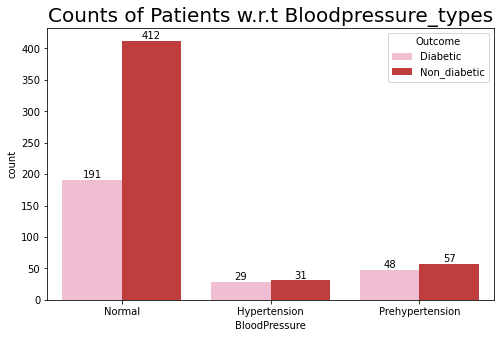

In [41]:
plt.figure(figsize=(8,5))
ax=sns.countplot(x=diabetes_df['BloodPressure'],hue=diabetes_df['Outcome'],palette='tab20_r')
ax.set_title('Counts of Patients w.r.t Bloodpressure_types',fontdict={'size':20})
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])

    From the above plot,
      * Most of the patients were recorded Normal blood pressurei.e., out of 768 patients 603 patients recorded with normal         blood pressure.But among them 412 patients were Non_diabetic and 191 patients were diabetic.
      * Out of 768 patients,60 patients were recorded with hypertension blood pressure,among them 29 patients were diabetic         and 31 patients were non_diabetic.
      * Out of 768 patients,105 patients were recorded with Prehypertension blood pressure,among them 48 patients were             diabetic and 57 patients were non_diabetic.
      * Overally, patients who were recorded highest in all types of Blood pressure levels were found out to be non_diabetic patients. 

In [42]:
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,Prediabetic,Normal,35,100.34,33.6,0.627,50,Diabetic
1,1,Normal blood sugar,Normal,29,68.79,26.6,0.351,31,Non_diabetic
2,8,Prediabetic,Normal,27,100.34,23.3,0.672,32,Diabetic
3,1,Normal blood sugar,Normal,23,94.00,28.1,0.167,21,Non_diabetic
4,0,Normal blood sugar,Normal,35,168.00,43.1,2.288,33,Diabetic


Text(0.5, 1.0, 'BMI w.r.t types of patients')

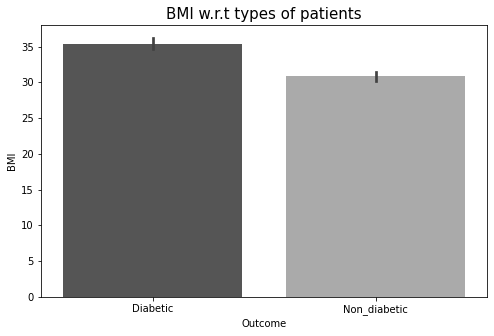

In [43]:
plt.figure(figsize=(8,5))
ax=sns.barplot(data=diabetes_df,x='Outcome',y='BMI',palette='gist_yarg_r')
plt.title('BMI w.r.t types of patients',fontdict={'size':15})

    From the above plot,
        * Patients with highest bmi's are recorded as diabetic patients.

In [44]:
extremums('BMI',"")

* The highest BMI recorded for a non_diabetic patient is 57.3 
* The lowest BMI recorded for a non_diabetic patient is 18.2 
* The highest BMI recorded for a diabetic patient is 67.1 
* The lowest BMI recorded for a diabetic patient is 22.9 


In [45]:
# Categoriesing BMI values based on bmi range.
for x in diabetes_df['BMI']:
    if x<=18.5:
        diabetes_df['BMI'].replace(x,'Underweight',inplace=True)
    elif (x>18.5 and x<25):
        diabetes_df['BMI'].replace(x,'Healthyweight',inplace=True)
    elif (x>25 and x<30):
        diabetes_df['BMI'].replace(x,'Overweight',inplace=True)
    else:
        diabetes_df['BMI'].replace(x,'Obesity',inplace=True)       

In [46]:
diabetes_df['BMI'].head()

0          Obesity
1       Overweight
2    Healthyweight
3       Overweight
4          Obesity
Name: BMI, dtype: object

[Text(0, 0, '268'), Text(0, 0, '133'), Text(0, 0, '95'), Text(0, 0, '4')]

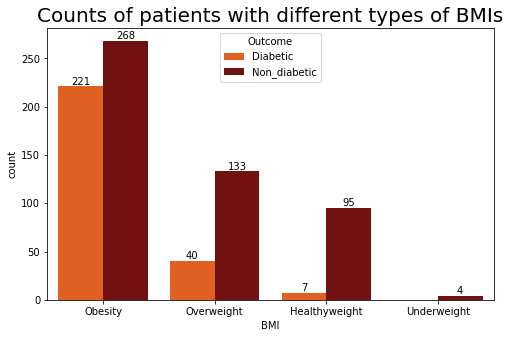

In [47]:
plt.figure(figsize=(8,5))
ax=sns.countplot(x=diabetes_df['BMI'],hue=diabetes_df['Outcome'],palette='gist_heat_r')
ax.set_title('Counts of patients with different types of BMIs',fontdict={'size':20})
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])

    From the above plot,
         * Out of 500 non_diabetic patients ,268 patients were recorded with obesity,133 patients were recorded with overweight,95 were recorded as healthy weight and 4 patients were recorded as under weight patients.
         * Out of 268 diabetic patients ,221 patients are obesy,40 patients were Overweight and 7 patients were healthy weight.
         * Overally most of the patients from the records shown to have obesity,irrespective of whether the patient is diabetic or non diabetic.

Text(0.5, 1.0, 'Insulin w.r.t BMI')

<Figure size 576x360 with 0 Axes>

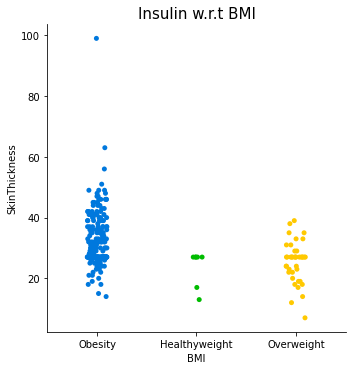

In [48]:
plt.figure(figsize=(8,5))
ax=sns.catplot(data=diabetes_df[diabetes_df['Outcome']=='Diabetic'],x='BMI',y='SkinThickness',palette='nipy_spectral')
plt.title('Insulin w.r.t BMI',size=15)

    From the above plot,we can conclude that most of the diabetic patients with greater TSKT found to have obesity.

<Figure size 576x360 with 0 Axes>

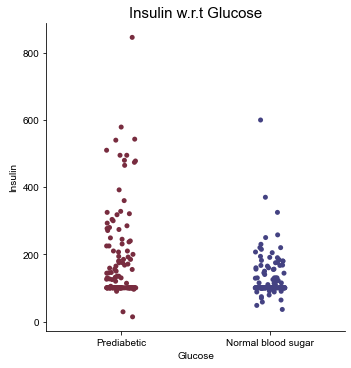

In [49]:
plt.figure(figsize=(8,5))
ax=sns.catplot(data=diabetes_df[diabetes_df['Outcome']=='Diabetic'],x='Glucose',y='Insulin',palette='icefire_r')
plt.title('Insulin w.r.t Glucose',size=15)
sns.set_style('darkgrid')

    From the above plot,
        * Diabetic patients with prediabetic glucose level condition found to have more insulin >200.

In [50]:
extremums('Insulin','')

* The highest Insulin recorded for a non_diabetic patient is 744.0 
* The lowest Insulin recorded for a non_diabetic patient is 15.0 
* The highest Insulin recorded for a diabetic patient is 846.0 
* The lowest Insulin recorded for a diabetic patient is 14.0 


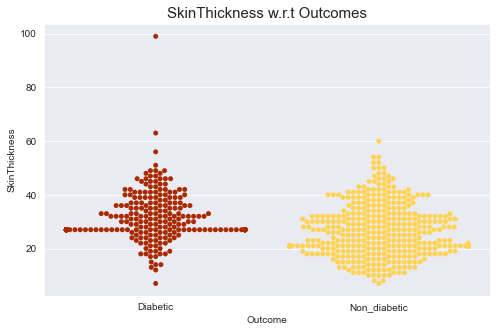

In [51]:
plt.figure(figsize=(8,5))
ax=sns.swarmplot(data=diabetes_df,x='Outcome',y='SkinThickness',palette='afmhot')
ax.set_title('SkinThickness w.r.t Outcomes',size=15)
sns.set_style('darkgrid')

    From the above plot,
        * Most of the diabetic patients were found to have the TSFT value ranges between 25 to 40.
        * For non_diabetic patients were found to have the TSFT value ranges between 10 to 40.

In [52]:
extremums('SkinThickness','')

* The highest SkinThickness recorded for a non_diabetic patient is 60 
* The lowest SkinThickness recorded for a non_diabetic patient is 7 
* The highest SkinThickness recorded for a diabetic patient is 99 
* The lowest SkinThickness recorded for a diabetic patient is 7 


In [53]:
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,Prediabetic,Normal,35,100.34,Obesity,0.627,50,Diabetic
1,1,Normal blood sugar,Normal,29,68.79,Overweight,0.351,31,Non_diabetic
2,8,Prediabetic,Normal,27,100.34,Healthyweight,0.672,32,Diabetic
3,1,Normal blood sugar,Normal,23,94.00,Overweight,0.167,21,Non_diabetic
4,0,Normal blood sugar,Normal,35,168.00,Obesity,2.288,33,Diabetic


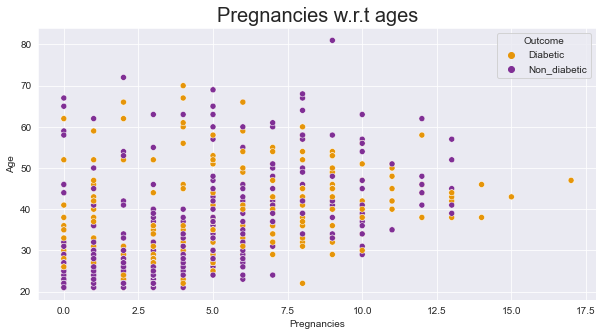

In [54]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=diabetes_df,x='Pregnancies',y='Age',hue='Outcome',palette="CMRmap_r")
plt.title('Pregnancies w.r.t ages',fontdict={'size':20})
sns.set_style('whitegrid')

    From the above plot,
        * Most of the patients of ages between 20 to 30 got pregnant for <=4 times were non_diabetic and also patients of age b/w 35 to 50 got pregnant for >7 times were mostly diabetic.
        * Most of the patients who got pregnant in between 20 to 30 years of age are non_diabetic patients.

Text(0.5, 1.0, 'Pregnancies w.r.t Glucose_level')

<Figure size 720x360 with 0 Axes>

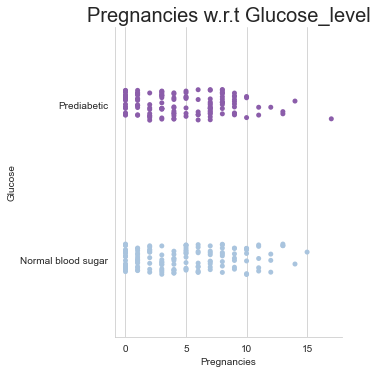

In [55]:
plt.figure(figsize=(10,5))
sns.catplot(data=diabetes_df[diabetes_df['Outcome']=='Diabetic'],y='Glucose',x='Pregnancies',palette="BuPu_r")
plt.title('Pregnancies w.r.t Glucose_level',fontdict={'size':20})

Text(0.5, 0, 'Tricep Skin Fold Thickness')

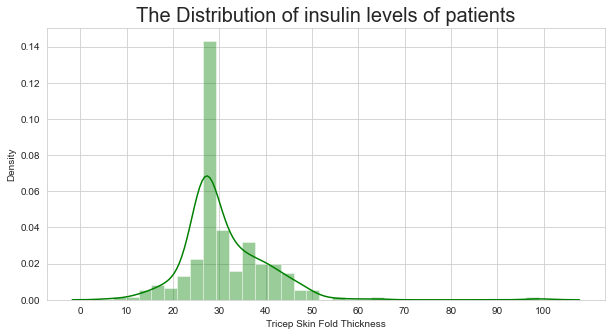

In [56]:
plt.figure(figsize=(10,5))
sns.distplot(x=diabetes_df['SkinThickness'].where(diabetes_df['Outcome']=='Diabetic'),color='green')
plt.title('The Distribution of insulin levels of patients',{'size':20})
plt.xticks(diabetes_df['SkinThickness'])
plt.xticks(range(0,101,10))
plt.xlabel('Tricep Skin Fold Thickness')

     From the above plot,
         * The Patients who got pregnant and not were recorded with prediabetic glucose level and it is completely independent of no of times the patient got pregnant.
         * Most of the patients who recorded with prediabetic glucose level were got pregnant for >=7 times.

<Figure size 720x360 with 0 Axes>

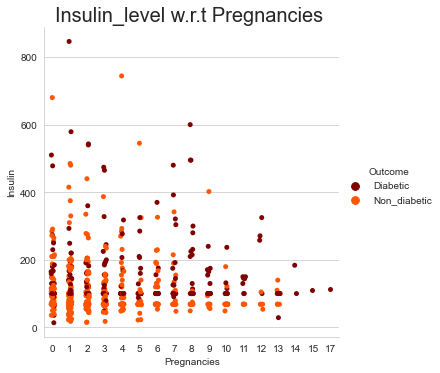

In [57]:
plt.figure(figsize=(10,5))
sns.catplot(data=diabetes_df,y='Insulin',x='Pregnancies',hue='Outcome',palette="gist_heat")
plt.title('Insulin_level w.r.t Pregnancies ',fontdict={'size':20})
sns.set_style('whitegrid')

    From the above plot,
        * Patients who got pregnant for more number of times were found to have low level insulin irrespective of whether she is diabetic or non diabetic.
        * Patients whose insulin greater than 200 found to have zero pregnancies which indicates that those women can't get pregnant.

Text(0.5, 1.0, 'Insulin_level w.r.t DiabetesPedigreeFunction')

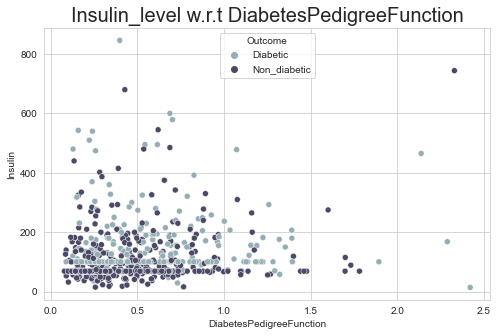

In [58]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=diabetes_df,y='Insulin',x='DiabetesPedigreeFunction',hue='Outcome',palette="bone_r")
plt.title('Insulin_level w.r.t DiabetesPedigreeFunction',fontdict={'size':20})

    From the above plot,
        * Low value of Diabetes pedigree Function (indicates less risk of type 2 diabetes) had observed to the most of non_diabetic patients who found to had low insulin level.
        * Most of the patients with diabetes were found to have low insulin level.

In [59]:
extremums('DiabetesPedigreeFunction','')

* The highest DiabetesPedigreeFunction recorded for a non_diabetic patient is 2.329 
* The lowest DiabetesPedigreeFunction recorded for a non_diabetic patient is 0.078 
* The highest DiabetesPedigreeFunction recorded for a diabetic patient is 2.42 
* The lowest DiabetesPedigreeFunction recorded for a diabetic patient is 0.088 


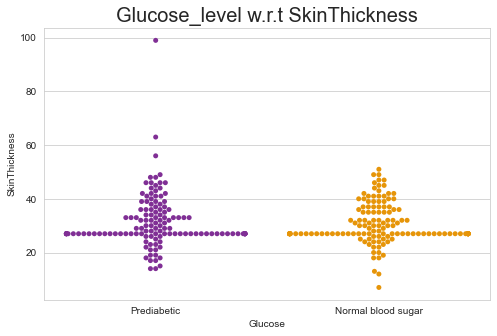

In [60]:
plt.figure(figsize=(8,5))
sns.swarmplot(data=diabetes_df[diabetes_df['Outcome']=='Diabetic'],y='SkinThickness',x='Glucose',palette="CMRmap")
plt.title('Glucose_level w.r.t SkinThickness',fontdict={'size':20})
sns.set_style('darkgrid')

    From the above plot,
        * Most of the diabetic patients with prediabetic conditions have the TSFT in the range of 20 to 50mm.

Text(0.5, 1.0, 'BMI w.r.t Glucose_level')

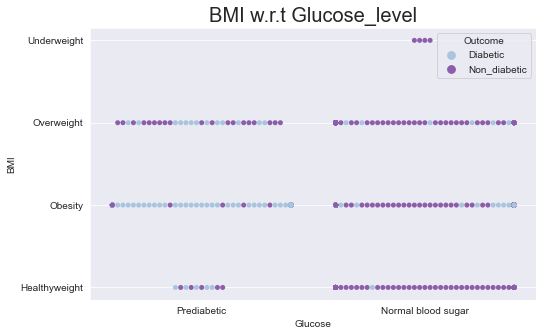

In [61]:
plt.figure(figsize=(8,5))
sns.swarmplot(data=diabetes_df,y='BMI',x='Glucose',hue='Outcome',palette="BuPu")
plt.title('BMI w.r.t Glucose_level',fontdict={'size':20})

    From the above plot,
        * Most patients who had obesity have had prediabetic glucose level health condition. 

In [62]:
infertile_patients=diabetes_df[(diabetes_df["Age"]>=35) & (diabetes_df["BMI"]=='Obesity')& (diabetes_df["Outcome"]=="Diabetic")& 
             (diabetes_df["Pregnancies"]==0)]

In [63]:
infertile_patients.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
66,0,Normal blood sugar,Prehypertension,30,100.34,Obesity,0.855,38,Diabetic
440,0,Prediabetic,Hypertension,25,100.34,Obesity,0.435,41,Diabetic
506,0,Prediabetic,Hypertension,26,90.00,Obesity,0.314,35,Diabetic
757,0,Normal blood sugar,Normal,27,100.34,Obesity,0.258,52,Diabetic


    Among 768 patients from the record found that 4 patients are infertile and all the 4 patients are obesy.

In [64]:
ndf.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,100.34,33.6,0.627,50,Diabetic
1,1,85,66,29,68.79,26.6,0.351,31,Non_diabetic
2,8,183,64,27,100.34,23.3,0.672,32,Diabetic
3,1,89,66,23,94.00,28.1,0.167,21,Non_diabetic
4,0,137,40,35,168.00,43.1,2.288,33,Diabetic


Text(0.5, 1.0, 'Insulin_level w.r.t DiabetesPedigreeFunction')

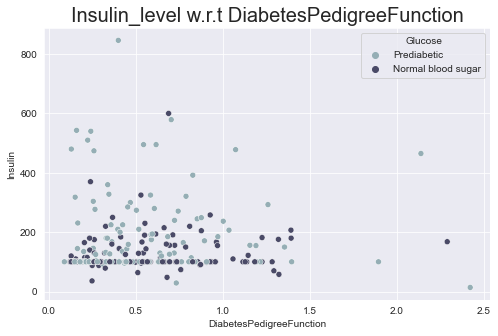

In [65]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=diabetes_df[diabetes_df['Outcome']=='Diabetic'],y='Insulin',x='DiabetesPedigreeFunction',hue='Glucose',palette="bone_r")
plt.title('Insulin_level w.r.t DiabetesPedigreeFunction',fontdict={'size':20})

    From the above plot,
        * The diabetic patients with prediabetic condition having low DiabetesPedigreeFunction values found to have higher insulin levels.

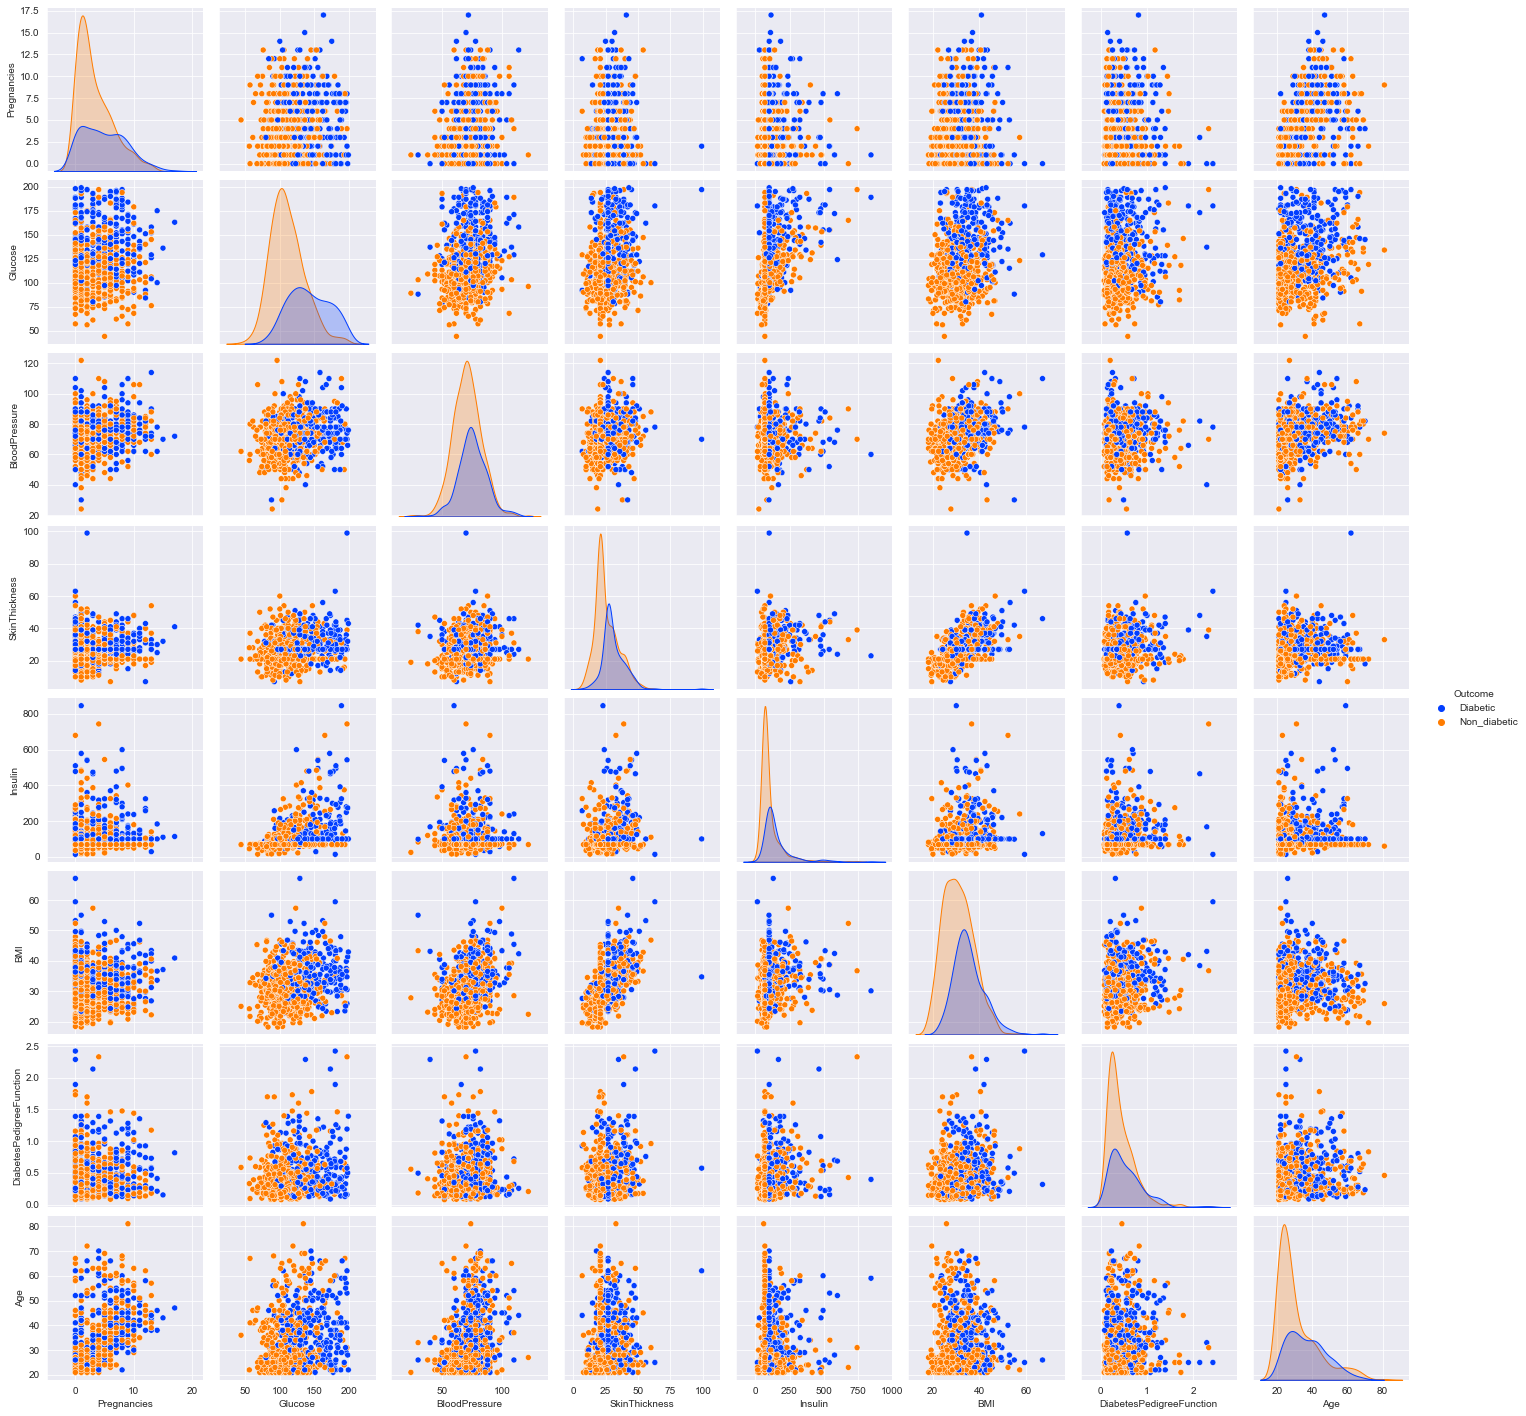

In [66]:
sns.pairplot(data=ndf,hue='Outcome',palette='bright')

array([[<AxesSubplot:title={'center':'Pregnancies'}>,
        <AxesSubplot:title={'center':'SkinThickness'}>],
       [<AxesSubplot:title={'center':'Insulin'}>,
        <AxesSubplot:title={'center':'DiabetesPedigreeFunction'}>],
       [<AxesSubplot:title={'center':'Age'}>, <AxesSubplot:>]],
      dtype=object)

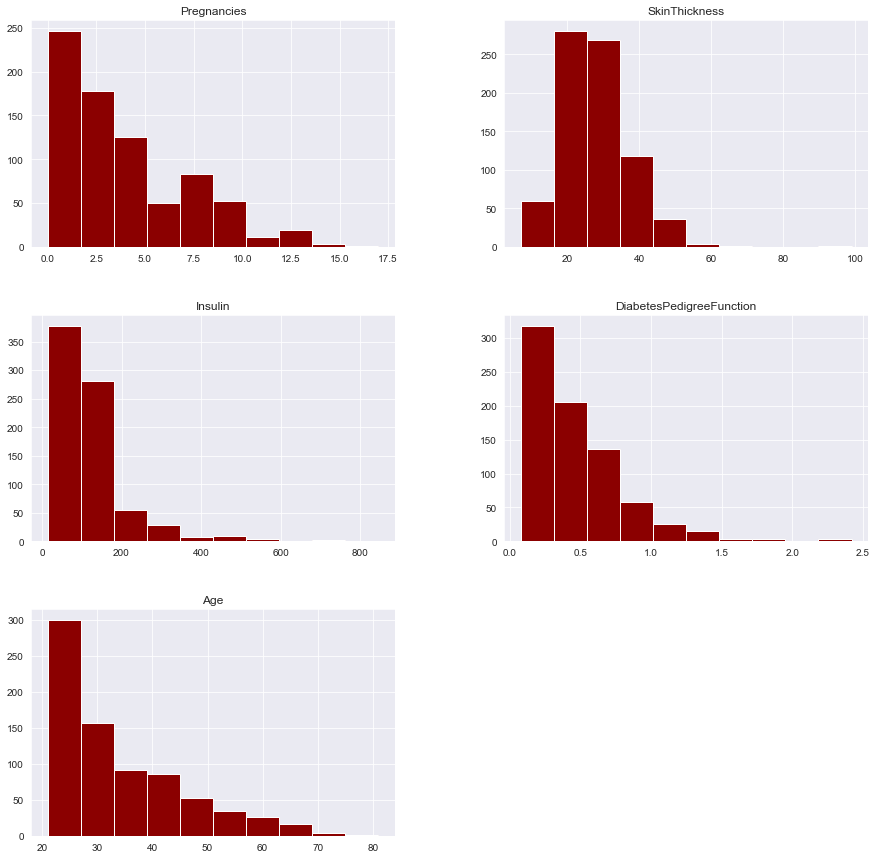

In [67]:
diabetes_df.hist(figsize=(15,15),color='Darkred')

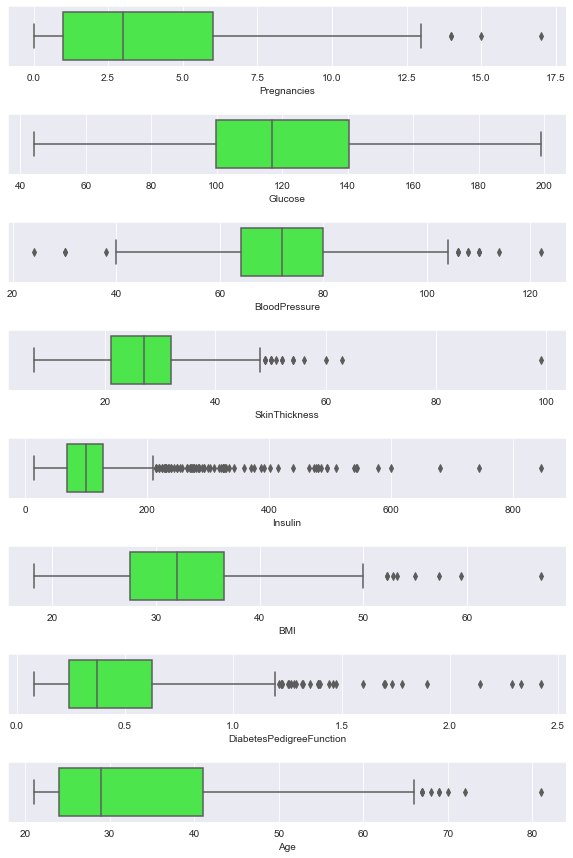

In [68]:
# Plotting boxplots to verify the outliers in the dataset or not
fig, axs = plt.subplots(8,figsize=(10,15))
plt.subplots_adjust(hspace = 0.8)
df1 = ndf.iloc[:,:-1]
for i,column in enumerate(df1):
    sns.boxplot(df1[column], ax=axs[i],color='#33ff33')
    axs[i].set_xlabel(column)

    From the above boxplot we can observe too many outliers and since the dataset has small values we have to use robust scaler method to bring the values into the InterQuartileRange.

In [69]:
df1.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.677083,72.378906,27.43099,118.967917,32.439167,0.471876,33.240885
std,3.369578,30.464161,12.104431,9.32146,93.558079,6.880462,0.331329,11.760232
min,0.000000,44.000000,24.000000,7.00000,14.000000,18.200000,0.078000,21.000000
25%,1.000000,99.750000,64.000000,21.00000,68.790000,27.500000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,27.00000,100.000000,32.050000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.00000,127.250000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.00000,846.000000,67.100000,2.420000,81.000000


<AxesSubplot:>

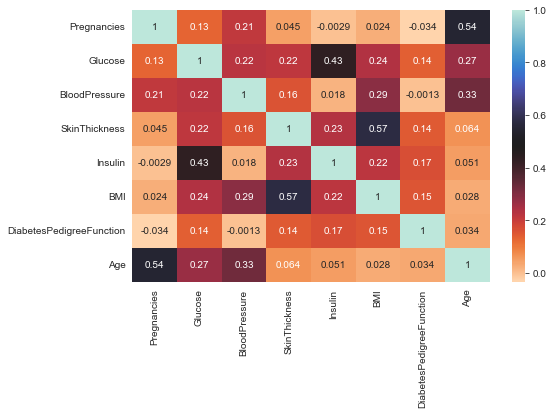

In [70]:
plt.figure(figsize=(8,5))
sns.heatmap(ndf.corr(),cmap='icefire_r',annot=True)

    From the correlation plot,
        * Age & Pregnancies,Glucose & Outcome,Skin Thickness & BMI,Glucose & Insulin are the pairs with high correlation.

# Building Machine Learning Algorithms

In [71]:
# Importing required libraries to build a model and to get output scores of performance of the model.
from sklearn.preprocessing import RobustScaler,StandardScaler
from sklearn.model_selection import train_test_split as split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score,confusion_matrix,roc_auc_score, roc_curve

In [72]:
# Applying robust scaler to features which are skwely distributed.
skewd_df=ndf[['Insulin','DiabetesPedigreeFunction','Pregnancies','Age']]
rs=RobustScaler()
skewd_values=rs.fit_transform(skewd_df)
skewd_df=pd.DataFrame(skewd_values,columns=['Insulin','DiabetesPedigreeFunction','Pregnancies','Age'])
skewd_df.head()

,Insulin,DiabetesPedigreeFunction,Pregnancies,Age
0,0.005816,0.665359,0.6,1.235294
1,-0.533869,-0.056209,-0.4,0.117647
2,0.005816,0.783007,1.0,0.176471
3,-0.102634,-0.537255,-0.4,-0.470588
4,1.163189,5.007843,-0.6,0.235294


In [73]:
ndf.drop(columns=['Pregnancies','Insulin','DiabetesPedigreeFunction','Age'],inplace=True) # dropping skewly distributed data.
final_df=skewd_df.join(ndf) # dataframe with noramalised distribution of data.

In [74]:
final_df.head()

,Insulin,DiabetesPedigreeFunction,Pregnancies,Age,Glucose,BloodPressure,SkinThickness,BMI,Outcome
0,0.005816,0.665359,0.6,1.235294,148,72,35,33.6,Diabetic
1,-0.533869,-0.056209,-0.4,0.117647,85,66,29,26.6,Non_diabetic
2,0.005816,0.783007,1.0,0.176471,183,64,27,23.3,Diabetic
3,-0.102634,-0.537255,-0.4,-0.470588,89,66,23,28.1,Non_diabetic
4,1.163189,5.007843,-0.6,0.235294,137,40,35,43.1,Diabetic


In [76]:
sc=StandardScaler()
x=sc.fit_transform(final_df.iloc[:,:-1])
x[0]

array([-0.19923513,  0.46849198,  0.63994726,  1.4259954 ,  0.86462486,
       -0.0313235 ,  0.8125275 ,  0.1688244 ])

In [87]:
y=final_df.iloc[:,-1].replace({'Diabetic':1,"Non_diabetic":0})
y[0]

1

In [88]:
Xtrain,Xtest,Ytrain,Ytest=split(x,y,test_size=0.3,random_state=0)

print(Xtrain.shape)
print(Ytrain.shape)
print(Xtest.shape)
print(Ytest.shape)

(537, 8)
(537,)
(231, 8)
(231,)


## LogisticRegression

In [89]:
lg=LogisticRegression()
lg.fit(Xtrain,Ytrain)
lg_Predicted_Y=lg.predict(Xtest)

In [90]:
Compared_values=pd.DataFrame({'Actual_y':Ytest,'Predict_Y':lg_Predicted_Y})
Compared_values.head()

,Actual_y,Predict_Y
661,1,1
122,0,0
113,0,0
14,1,1
529,0,0


In [91]:
print('confusion_matrix:\n',confusion_matrix(Ytest,lg_Predicted_Y))
print('===================')
print('accuracy_score:',accuracy_score(Ytest,lg_Predicted_Y))
print('===================')
print('classification_report:\n',classification_report(Ytest,lg_Predicted_Y)) 

confusion_matrix:
 [[138  19]
 [ 38  36]]
accuracy_score: 0.7532467532467533
classification_report:
               precision    recall  f1-score   support

           0       0.78      0.88      0.83       157
           1       0.65      0.49      0.56        74

    accuracy                           0.75       231
   macro avg       0.72      0.68      0.69       231
weighted avg       0.74      0.75      0.74       231



### From the predictions of model built by LogisticRegression algorithm,the output results are:
      *  Out of 231 values,57 values classes(i.e.,Diabetic,Non_diabetic) get imbalanced.
      *  Out of 74 predictions for patients to be diabetic, the model reported diabetic for 36 patients as per the            records where as for 38 patients who are reported diabetic are actually non_diabetic.
      *  Out of 157 patients with non_diabetic prediction values,19 patients are misclassified to be non_diabetic and 138 patients are predicted as non diabetic as reported in the records.
      * Therefore,Out of 55 diabetic patients 36 patients are predicted truly as diabetic and 19 patients are predicted falsely as non_diabetic.Out of 176 non_diabetic patients,138 patients are predicted truly as non_diabetic as recorded in the records and 38 patients are predicted as diabeic are actually diabetic. 
      
#### Accuracy of the build model is 75% ,recall of build model for Diabetic is 49% and for Non_diabetic is 88%,precision of build model for diabetic patients is 65% and for non_diabetic is 78%.

## DecisionTreeClassifier

In [92]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc.fit(Xtrain,Ytrain)
Y_predict_dtc=dtc.predict(Xtest)

print('confusion_matrix:\n',confusion_matrix(Ytest,Y_predict_dtc))
print('===================')
print('accuracy_score:',accuracy_score(Ytest,Y_predict_dtc))
print('===================')
print('classification_report:\n',classification_report(Ytest,Y_predict_dtc))

confusion_matrix:
 [[145  12]
 [ 14  60]]
accuracy_score: 0.8874458874458875
classification_report:
               precision    recall  f1-score   support

           0       0.91      0.92      0.92       157
           1       0.83      0.81      0.82        74

    accuracy                           0.89       231
   macro avg       0.87      0.87      0.87       231
weighted avg       0.89      0.89      0.89       231



### From the predictions of model built by DecisionTreeClassifier algorithm,the output results are:
      *  Out of 231 values,26 values classes(i.e.,Diabetic,Non_diabetic) get imbalanced.
      *  Out of 74 predictions for patients to be diabetic, the model reported diabetic for 60 patients as per the            records where as for 14 patients who are reported diabetic are actually non_diabetic.
      *  Out of 157 patients with non_diabetic prediction values,12 patients are misclassified to be non_diabetic and 145 patients are predicted as non diabetic as reported in the records.
      * Therefore,Out of 72 diabetic patients 60 patients are predicted truly as diabetic and 12 patients are predicted falsely as non_diabetic.Out of 159 non_diabetic patients,145 patients are predicted truly as non_diabetic as recorded in the records and 14 patients are predicted as diabeic are actually diabetic. 
      
#### Accuracy of the build model is 89% ,recall of build model for Diabetic is 81% and for Non_diabetic is 92%,precision of build model for diabetic patients is 83% and for non_diabetic is 91%.

## RandomForestClassifier 

In [93]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
Rfc=RandomForestClassifier(n_estimators=50,random_state=0)
Rfc.fit(Xtrain,Ytrain)
Y_predict_rfc=Rfc.predict(Xtest)

print('confusion_matrix:\n',confusion_matrix(Ytest,Y_predict_rfc))
print('===================')
print('accuracy_score:',accuracy_score(Ytest,Y_predict_rfc))
print('===================')
print('classification_report:\n',classification_report(Ytest,Y_predict_rfc))

confusion_matrix:
 [[148   9]
 [ 11  63]]
accuracy_score: 0.9134199134199135
classification_report:
               precision    recall  f1-score   support

           0       0.93      0.94      0.94       157
           1       0.88      0.85      0.86        74

    accuracy                           0.91       231
   macro avg       0.90      0.90      0.90       231
weighted avg       0.91      0.91      0.91       231



### From the predictions of model built by RandomForestClassifier algorithm,the output results are:
      *  Out of 231 values,20 values classes(i.e.,Diabetic,Non_diabetic) get imbalanced.
      *  Out of 74 predictions for patients to be diabetic, the model reported diabetic for 63 patients as per the            records where as 11 patients who are reported diabetic are actually non_diabetic.
      *  Out of 157 patients with non_diabetic prediction values,9 patients are misclassified to be non_diabetic and 148    patients are predicted as non diabetic as reported in the records.
      * Therefore,Out of 72 diabetic patients 63 patients are predicted truly as diabetic and 9 patients are predicted falsely as non_diabetic.Out of 159 non_diabetic patients,148 patients are predicted truly as non_diabetic as recorded in the records and 11 patients are predicted as diabeic are actually diabetic. 
      
#### Accuracy of the build model is 91% ,recall of build model for Diabetic is 85% and for Non_diabetic is 94%,precision of build model for diabetic patients is 88% and for non_diabetic is 93%.

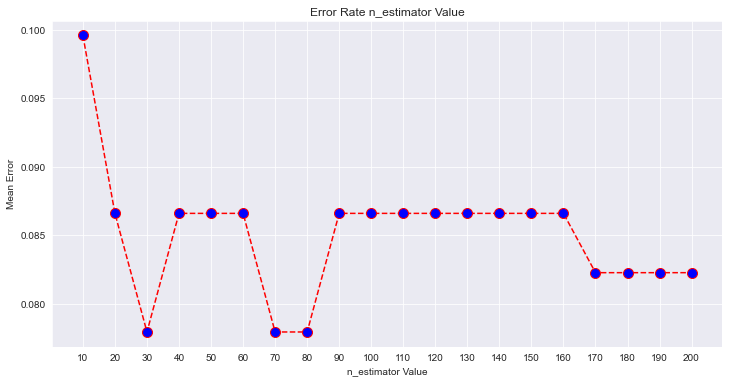

In [94]:
error = []  
# Calculating error for K values between 10 and 200, 
# stepping by 10 units each time
for i in range(10, 201, 10):  
    classifier = RandomForestClassifier(n_estimators = i,random_state=0)
    classifier.fit(Xtrain,Ytrain)
    pred_i = classifier.predict(Xtest)
    error.append(np.mean(pred_i != Ytest)) 

plt.figure(figsize=(12, 6))  
plt.plot(range(10, 201, 10), error, color='red', 
         linestyle='dashed', marker='o', markerfacecolor='blue', 
         markersize=10)
plt.xticks(np.arange(10, 201, step=10))
plt.title('Error Rate n_estimator Value')  
plt.xlabel('n_estimator Value')  
plt.ylabel('Mean Error');    

    # N_estimators indicates the no. of decision trees that was build a model found to be the best for RandomForestClassifier from the above plot is 30,70 to 80 for random state=0 which can build the model with low error.

In [95]:
f_Rfc=RandomForestClassifier(n_estimators=30,random_state=0)
f_Rfc.fit(Xtrain,Ytrain)
Y_predict_rfc=f_Rfc.predict(Xtest)

print('confusion_matrix:\n',confusion_matrix(Ytest,Y_predict_rfc))
print('===================')
print('accuracy_score:',accuracy_score(Ytest,Y_predict_rfc))
print('===================')
print('classification_report:\n',classification_report(Ytest,Y_predict_rfc))

confusion_matrix:
 [[150   7]
 [ 11  63]]
accuracy_score: 0.922077922077922
classification_report:
               precision    recall  f1-score   support

           0       0.93      0.96      0.94       157
           1       0.90      0.85      0.88        74

    accuracy                           0.92       231
   macro avg       0.92      0.90      0.91       231
weighted avg       0.92      0.92      0.92       231



### From the predictions of model built by RandomForestClassifier algorithm,the output results are:
          * Out of 231 values,18 values classes(i.e.,Diabetic,Non_diabetic) get imbalanced.
          * Out of 74 predictions for patients to be diabetic, the model reported diabetic for 63 patients as per the                   records where as for 11 patients who are reported diabetic are actually non_diabetic.
          * Out of 157 patients with non_diabetic prediction values,7 patients are misclassified to be non_diabetic and                 150 patients are predicted as non diabetic as reported in the records.
          * Therefore,Out of 70 diabetic patients 63 patients are predicted truly as diabetic and 7 patients are predicted            falsely as non_diabetic.Out of 161 non_diabetic patients,150 patients are predicted truly as non_diabetic as                recorded in the records and 11 patients are predicted as diabetic are actually non_diabetic. 
      
#### Accuracy of the build model is 92% ,recall of build model for Diabetic is 85% and for Non_diabetic is 96%,precision of build model for diabetic patients is 90% and for non_diabetic is 93%.

##  KNeighborsClassifier

In [96]:
from sklearn.neighbors import KNeighborsClassifier
classifier_knn= KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2)           
classifier_knn.fit(Xtrain,Ytrain)
Y_pred_knn = classifier_knn.predict(Xtest)

In [97]:
print('confusion_matrix:\n',confusion_matrix(Ytest,Y_pred_knn))
print('===================')
print('accuracy_score:',accuracy_score(Ytest,Y_pred_knn))
print('===================')
print('classification_report:\n',classification_report(Ytest,Y_pred_knn))

confusion_matrix:
 [[139  18]
 [ 24  50]]
accuracy_score: 0.8181818181818182
classification_report:
               precision    recall  f1-score   support

           0       0.85      0.89      0.87       157
           1       0.74      0.68      0.70        74

    accuracy                           0.82       231
   macro avg       0.79      0.78      0.79       231
weighted avg       0.82      0.82      0.82       231



### From the predictions of model built by KNeighborsClassifier algorithm,the output  results are:

          * Out of 231 values,42 values classes(i.e.,Diabetic,Non_diabetic) get imbalanced.
          * Out of 74 predictions for patients to be diabetic, the model reported diabetic for 50 patients as per the                   records where as for 24 patients who were reported diabetic are actually non_diabetic.
          * Out of 157 patients with non_diabetic prediction values,18 patients are misclassified to be non_diabetic and                 139 patients are predicted as non diabetic as reported in the records.
          * Therefore,Out of 68 diabetic patients 50 patients are predicted truly as diabetic and 18 patients are predicted            falsely as non_diabetic.Out of 163 non_diabetic patients,139 patients are predicted truly as non_diabetic as                recorded in the records and 24 patients are predicted as diabetic are actually non_diabetic. 
      
#### Accuracy of the build model is 82% ,recall of build model for Diabetic is 68% and for Non_diabetic is 89%,precision of build model for diabetic patients is 74% and for non_diabetic is 85%.

In [98]:
y=y.replace({'Diabetic':1,'Non_diabetic':0})
Xtrain,Xtest,Ytrain,Ytest=split(x,y,test_size=0.3,random_state=0)

##  XGBoostClassifier 

In [99]:
import xgboost as xgb
xgb_clf=xgb.XGBClassifier(objective="binary:logistic", random_state=0)
xgb_clf.fit(Xtrain,Ytrain)
Y_pred_xgb=xgb_clf.predict(Xtest)

print('confusion_matrix:\n',confusion_matrix(Ytest,Y_pred_xgb))
print('===================')
print('accuracy_score:',accuracy_score(Ytest,Y_pred_xgb))
print('===================')
print('classification_report:\n',classification_report(Ytest,Y_pred_xgb))

confusion_matrix:
 [[148   9]
 [ 12  62]]
accuracy_score: 0.9090909090909091
classification_report:
               precision    recall  f1-score   support

           0       0.93      0.94      0.93       157
           1       0.87      0.84      0.86        74

    accuracy                           0.91       231
   macro avg       0.90      0.89      0.89       231
weighted avg       0.91      0.91      0.91       231



### From the predictions of model built by XGBClassifier algorithm,the output    results are:

          * Out of 231 values,20 values classes(i.e.,Diabetic,Non_diabetic) get imbalanced.
          * Out of 74 predictions for patients to be diabetic, the model reported diabetic for 62 patients as per the                   records where as for 12 patients who were reported diabetic are actually non_diabetic.
          * Out of 157 patients with non_diabetic prediction values,9 patients are misclassified to be non_diabetic and                 149 patients are predicted as non diabetic as reported in the records.
          * Therefore,Out of 71 diabetic patients 62 patients are predicted truly as diabetic and 9 patients are predicted            falsely as diabetic.Out of 160 non_diabetic patients,148 patients are predicted truly as non_diabetic as                recorded in the records and 12 patients are predicted as diabetic are actually non_diabetic. 
      
#### Accuracy of the build model is 91% ,recall of build model for Diabetic is 84% and for Non_diabetic is 94%,precision of build model for diabetic patients is 87% and for non_diabetic is 93%.

## Among all machine learning algorithms,RandomForestClassifer predicts the result with more accuracy,recall and precision than the KNN classifier.

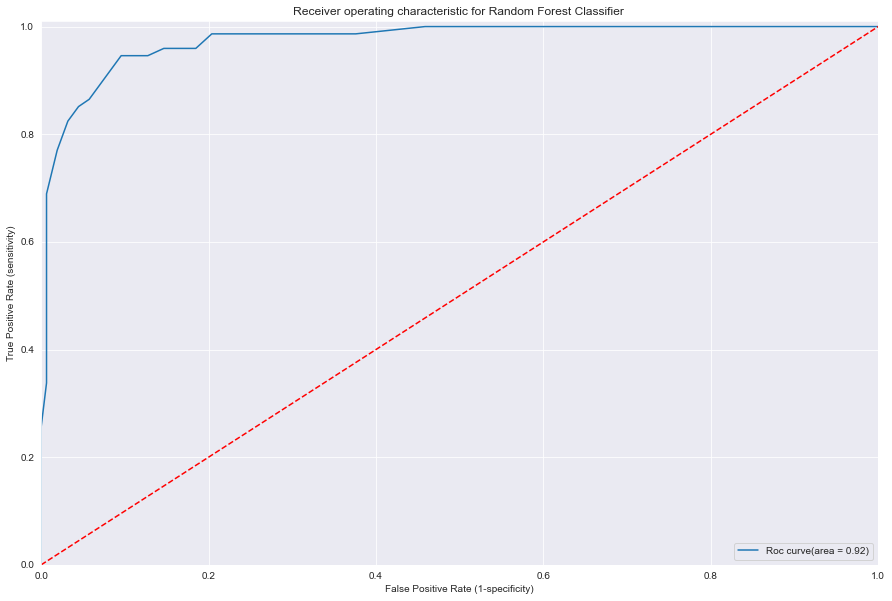

In [100]:
FPR,TPR, thershold = roc_curve(Ytest,f_Rfc.predict_proba(Xtest)[:,1])
Rfc_roc = roc_auc_score(Y_predict_rfc,Ytest)
#plt.figure()
plt.subplots(figsize=(15,10))
plt.plot(FPR,TPR, label = 'Roc curve(area = %0.2f)'%Rfc_roc)
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0,1.0])
plt.ylim([0,1.01])
plt.xlabel('False Positive Rate (1-specificity)')
plt.ylabel('True Positive Rate (sensitivity)')
plt.title('Receiver operating characteristic for Random Forest Classifier ')
plt.legend(loc ="lower right")

### AUC (Area under curve) represents how good the model is predicting the target .,i.e Either as Diabetic or Non_diabetic in this case.From the above plot we can see that area is 0.92 ==>with 92%  accuracy the model can predict the outcome.

    With less specificity the RandomForestClassifier model generates more sensitivity as compared to other algorithms model